In [1]:
import numpy as np
import librosa.display, os
import matplotlib.pyplot as plt
%matplotlib inline

def create_spectrogram(audio_file, image_file):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

    y, sr = librosa.load(audio_file)
    ms = librosa.feature.melspectrogram(y=y, sr=sr)
    log_ms = librosa.power_to_db(ms, ref=np.max)
    librosa.display.specshow(log_ms, sr=sr)

    fig.savefig(image_file)
    plt.close(fig)
    
def create_pngs_from_wavs(input_path, output_path):
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    dir = os.listdir(input_path)

    for i, file in enumerate(dir):
        input_file = os.path.join(input_path, file)
        output_file = os.path.join(output_path, file.replace('.wav', '.png'))
        create_spectrogram(input_file, output_file)

In [3]:
dir = os.listdir(input_path)

In [4]:
dir

['recording14044.wav_norm_mono.wav',
 'recording14045.wav_norm_mono.wav',
 'recording14046.wav_norm_mono.wav',
 'recording14047.wav_norm_mono.wav',
 'recording14048.wav_norm_mono.wav',
 'recording14049.wav_norm_mono.wav',
 'recording14050.wav_norm_mono.wav',
 'recording14051.wav_norm_mono.wav',
 'recording14054.wav_norm_mono.wav',
 'recording14055.wav_norm_mono.wav',
 'recording14056.wav_norm_mono.wav',
 'recording14057.wav_norm_mono.wav',
 'recording14058.wav_norm_mono.wav',
 'recording14059.wav_norm_mono.wav',
 'recording14060.wav_norm_mono.wav',
 'recording14061.wav_norm_mono.wav',
 'recording14062.wav_norm_mono.wav',
 'recording14063.wav_norm_mono.wav',
 'recording14064.wav_norm_mono.wav',
 'recording14065.wav_norm_mono.wav',
 'recording14066.wav_norm_mono.wav',
 'recording14067.wav_norm_mono.wav',
 'recording14068.wav_norm_mono.wav',
 'recording14069.wav_norm_mono.wav',
 'recording14070.wav_norm_mono.wav',
 'recording14071.wav_norm_mono.wav',
 'recording14072.wav_norm_mono.wav',
 

In [ ]:
output_file = os.path.join(output_path, file.replace('.wav', '.png'))

In [ ]:
input_file = os.path.join(input_path, file)

In [2]:
input_path = 'for-rerecorded/validation/fake'

Fake audio to spectogram

In [2]:
create_pngs_from_wavs('for-rerecorded/validation/fake', 'spectrograms_training/validation')

In [4]:
create_pngs_from_wavs('for-rerecorded/testing/fake', 'spectrograms_training/testing/fake')

Real audio to spectogram

In [3]:
create_pngs_from_wavs('for-rerecorded/validation/real', 'spectrograms_training/validation/real')

In [5]:
create_pngs_from_wavs('for-rerecorded/testing/real', 'spectrograms_training/testing/real')

In [4]:
from tensorflow.keras.utils import load_img, img_to_array 

def load_images_from_path(path, label):
    images = []
    labels = []

    for file in os.listdir(path):
        images.append(img_to_array(load_img(os.path.join(path, file), target_size=(224, 224, 3))))
        labels.append((label))
        
    return images, labels

def show_images(images):
    fig, axes = plt.subplots(1, 8, figsize=(20, 20), subplot_kw={'xticks': [], 'yticks': []})

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i] / 255)
        
x = []
y = []

In [5]:
import keras
keras.__version__

'2.6.0'

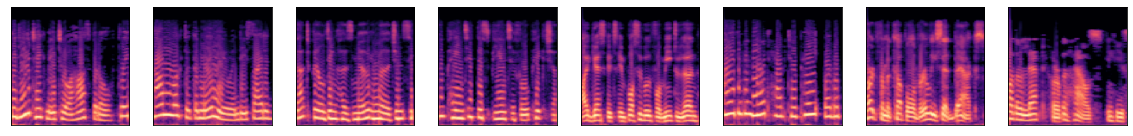

In [6]:
images, labels = load_images_from_path('Spectrograms/fake', 0)
show_images(images)
    
x += images
y += labels

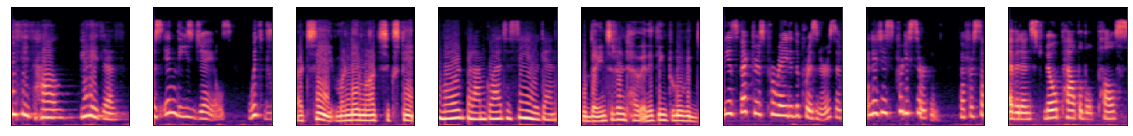

In [7]:
images, labels = load_images_from_path('Spectrograms/real', 1)
show_images(images)
    
x += images
y += labels

In [10]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.5, random_state=42)

x_train_norm = np.array(x_train) / 255
x_test_norm = np.array(x_test) / 255

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [11]:
print('Train image shape',x_train_norm[0].shape, '\n', len(x_train_norm))
print('Train labels',y_train_encoded[0], '\n', y_train_encoded.shape)
print('Test image shape',x_test_norm[0].shape, '\n', len(x_test_norm))
print('Test labels',y_test_encoded[0:10], '\n', y_test_encoded.shape)

Train image shape (224, 224, 3) 
 5104
Train labels [1. 0.] 
 (5104, 2)
Test image shape (224, 224, 3) 
 5104
Test labels [[1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]] 
 (5104, 2)


In [12]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(2, activation='sigmoid'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 128)     36992     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       1

In [13]:
hist = model.fit(x_train_norm, y_train_encoded, validation_data=(x_test_norm, y_test_encoded), batch_size=10, epochs=10)

Epoch 1/10
511/511 [==============================] - 545s 1s/step - loss: 0.5096 - accuracy: 0.7132 - val_loss: 0.3175 - val_accuracy: 0.8552
Epoch 2/10
511/511 [==============================] - 530s 1s/step - loss: 0.2345 - accuracy: 0.8991 - val_loss: 0.1799 - val_accuracy: 0.9230
Epoch 3/10
511/511 [==============================] - 528s 1s/step - loss: 0.1244 - accuracy: 0.9520 - val_loss: 0.1550 - val_accuracy: 0.9412
Epoch 4/10
511/511 [==============================] - 532s 1s/step - loss: 0.0798 - accuracy: 0.9706 - val_loss: 0.1997 - val_accuracy: 0.9240
Epoch 5/10
511/511 [==============================] - 529s 1s/step - loss: 0.0502 - accuracy: 0.9830 - val_loss: 0.1153 - val_accuracy: 0.9589
Epoch 6/10
511/511 [==============================] - 527s 1s/step - loss: 0.0411 - accuracy: 0.9841 - val_loss: 0.1131 - val_accuracy: 0.9649
Epoch 7/10
511/511 [==============================] - 543s 1s/step - loss: 0.0306 - accuracy: 0.9898 - val_loss: 0.1342 - val_accuracy: 0.9667

In [14]:
# View weights learnt by the model
model.save_weights('./checkpoints/my_checkpoint2')
model.save('Capstone/saved_model/my_cnn')

In [17]:

acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()
plt.close()

In [19]:
print(acc)

In [20]:
2+2

In [21]:
model.summary()